In [1]:
'''
this is the master script for the OTT map calibration and REQ verification.
data are not collected with this script. This script is just for data analysis.

the workflow for the OTT calibration and  verification is a follows:
-preparation of a calibration package:
-- in image_registration lib
    
usage of the calibration
-- in ott_calibration_lib

REQ verification
 in the current script

how to add markers in 20230901_par_registration_test.py
'''
import numpy as np
from m4.utils import image_registration_lib as imgreg
from m4.mini_OTT import timehistory as th
from m4.ground import read_ottcalib_conf
from m4.ground import zernike as zern
from m4.analyzers import requirement_analyzer as ra
from m4.ground import geo
from matplotlib.pyplot import *
from importlib import reload
from astropy.io import fits as pyfits
# Initilization data

px_ott = 0.00076
f0 = 0
f1 = 40

tnconf = '20231011_100000' #old L3. Configuration to remap the PAR
tnconf = '20231011_140000' #new L3. Configuration to remap the PAR
tnpar  = '20231011_150952' #associated ParRemapped
tnconf = '20231013_230000' # 3 tracknum for ott markers
tnpar  = '20231016_121641' #order 6 '20231014_005211' #associated ParRemapped
tnpar  = '20231016_124531' #order 10

tnott  = '20231011_164520' #RM270
tnott  = '20231012_224214' #RM450
tnott  = '20231006_123231' #RM600
tnott  = '20231007_114524' #RM600
tnott  = '20231012_182010' #RM750
tnott  = '20231010_210434' #RM930

#OTT meas after alignment on local coordinates
tnott  = '20231011_164520' #RM270
tnott  = '20231012_224214' #RM450
tnott  = '20231006_123231' #RM600
tnott  = '20231007_114524' #RM600
tnott  = '20231012_182010' #RM750
tnott  = '20231010_210434' #RM930
#----
#OTT meas after alignment on global coordinates. tnpar used=20231016_124531
tnott = '20231029_150436' #RM200
tnott = '20231029_105812' #RM400
tnott = '20231029_175926' #RM600
tnott = '20231028_223658' #RM800
tnott = '20231028_204448' #RM1000
z2corr = [1,2,3,4]


#### HOW TO SECTION
#restoring the configuration (All TNs and markers list)
cgh_tn_marker,cgh_tn_img,tnpar,mark_cgh_list,f0,f1,ott_tn_marker,ott_tn_img,mark_ott_list,px_ott = read_ottcalib_conf.gimmetheconf(tnconf)

#How to create a registered image of the PAR
#processing the data
par_remapped, ott_image, tnpar = imgreg.register_par(tnconf)
par_remapped2, ott_image2, tnpar2 = imgreg.register_par(tnconf, forder=5)

Using the Python console for data analysis.
Base data path is: /mnt/backup/Archeopterix_20230517/Data/

           |X|_____ _____|X|
           |X|           |X|
           |X|_____--___<|X|
           |X|    |\  /| |X|
     __    |X|    |_\/_| |X|
    |  |   |X|    | /\ | |X|
    |  |   |X|    |/  \| |X|
 ___|__|___|X|____ ---- _|X|_____
/mnt/backup/Archeopterix_20230517/Data/M4Data/OPTData/OTTCalibConf/20231013_230000.ini
/mnt/backup/Archeopterix_20230517/Data/M4Data/OPTData/OTTCalibConf/20231013_230000.ini
/mnt/backup/Archeopterix_20230517/Data/M4Data/OPTData//OPDSeries/20230428_093328/20*.fits
flipping the frame
/mnt/backup/Archeopterix_20230517/Data/M4Data/OPTData//OPDSeries/20230428_093328
/mnt/backup/Archeopterix_20230517/Data/M4Data/OPTData//OPDSeries/20230428_093328/20*.fits
flipping
25
flipping
25
flipping
25
flipping
25
flipping
25
flipping
25
flipping
25
flipping
25
flipping
25
flipping
25
Offset values flipped:[180 180]
Multi Tracknum
N tracknum3
/mnt/backup/Archeopterix_2

Text(0.5, 1.0, '6DOF  23.268')

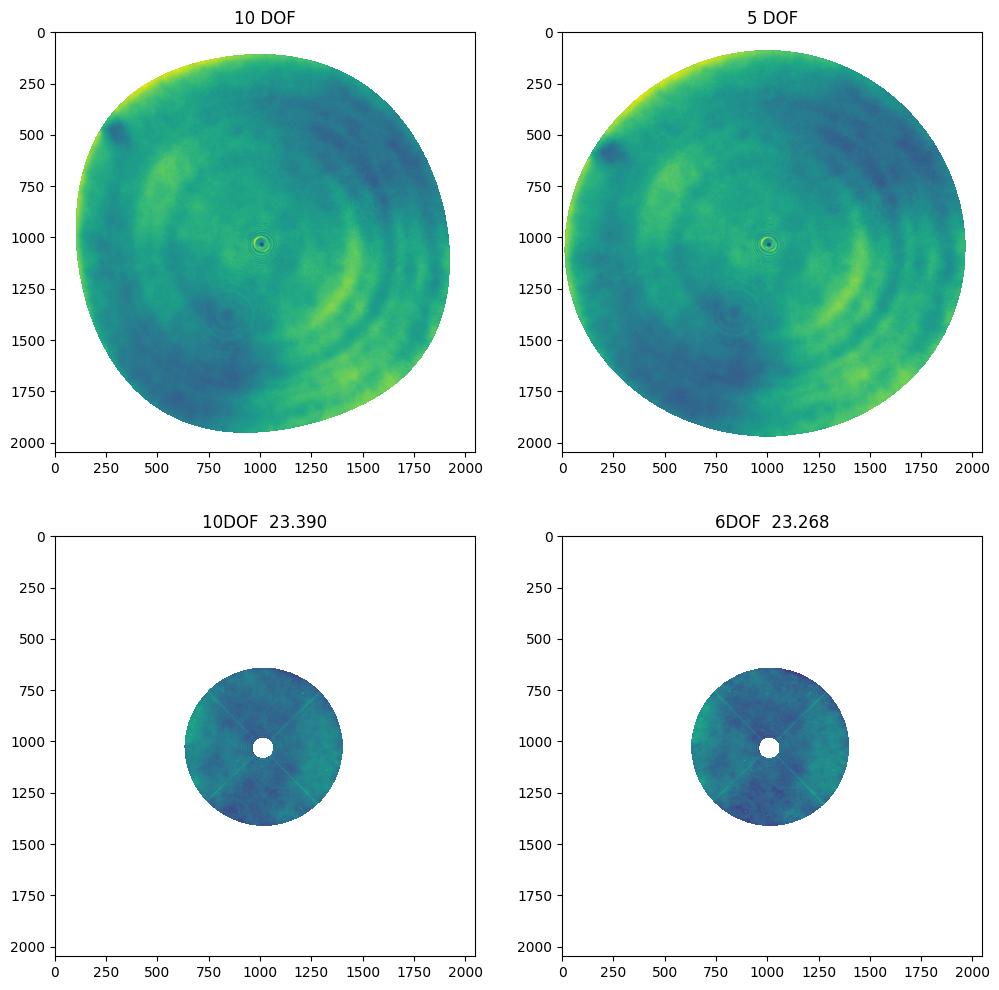

In [4]:
figure(figsize = (12,12))
subplot(2,2,1);imshow(par_remapped);title("10 DOF" % (np.std(ott_image-par_remapped)*1e9))
subplot(2,2,2);imshow(par_remapped2);title("5 DOF" % (np.std(ott_image-par_remapped2)*1e9))
subplot(2,2,3);imshow(ott_image-par_remapped);title("10DOF %7.3f" % (np.std(ott_image-par_remapped)*1e9))
subplot(2,2,4);imshow(ott_image-par_remapped2);title("6DOF %7.3f" % (np.std(ott_image-par_remapped2)*1e9))


